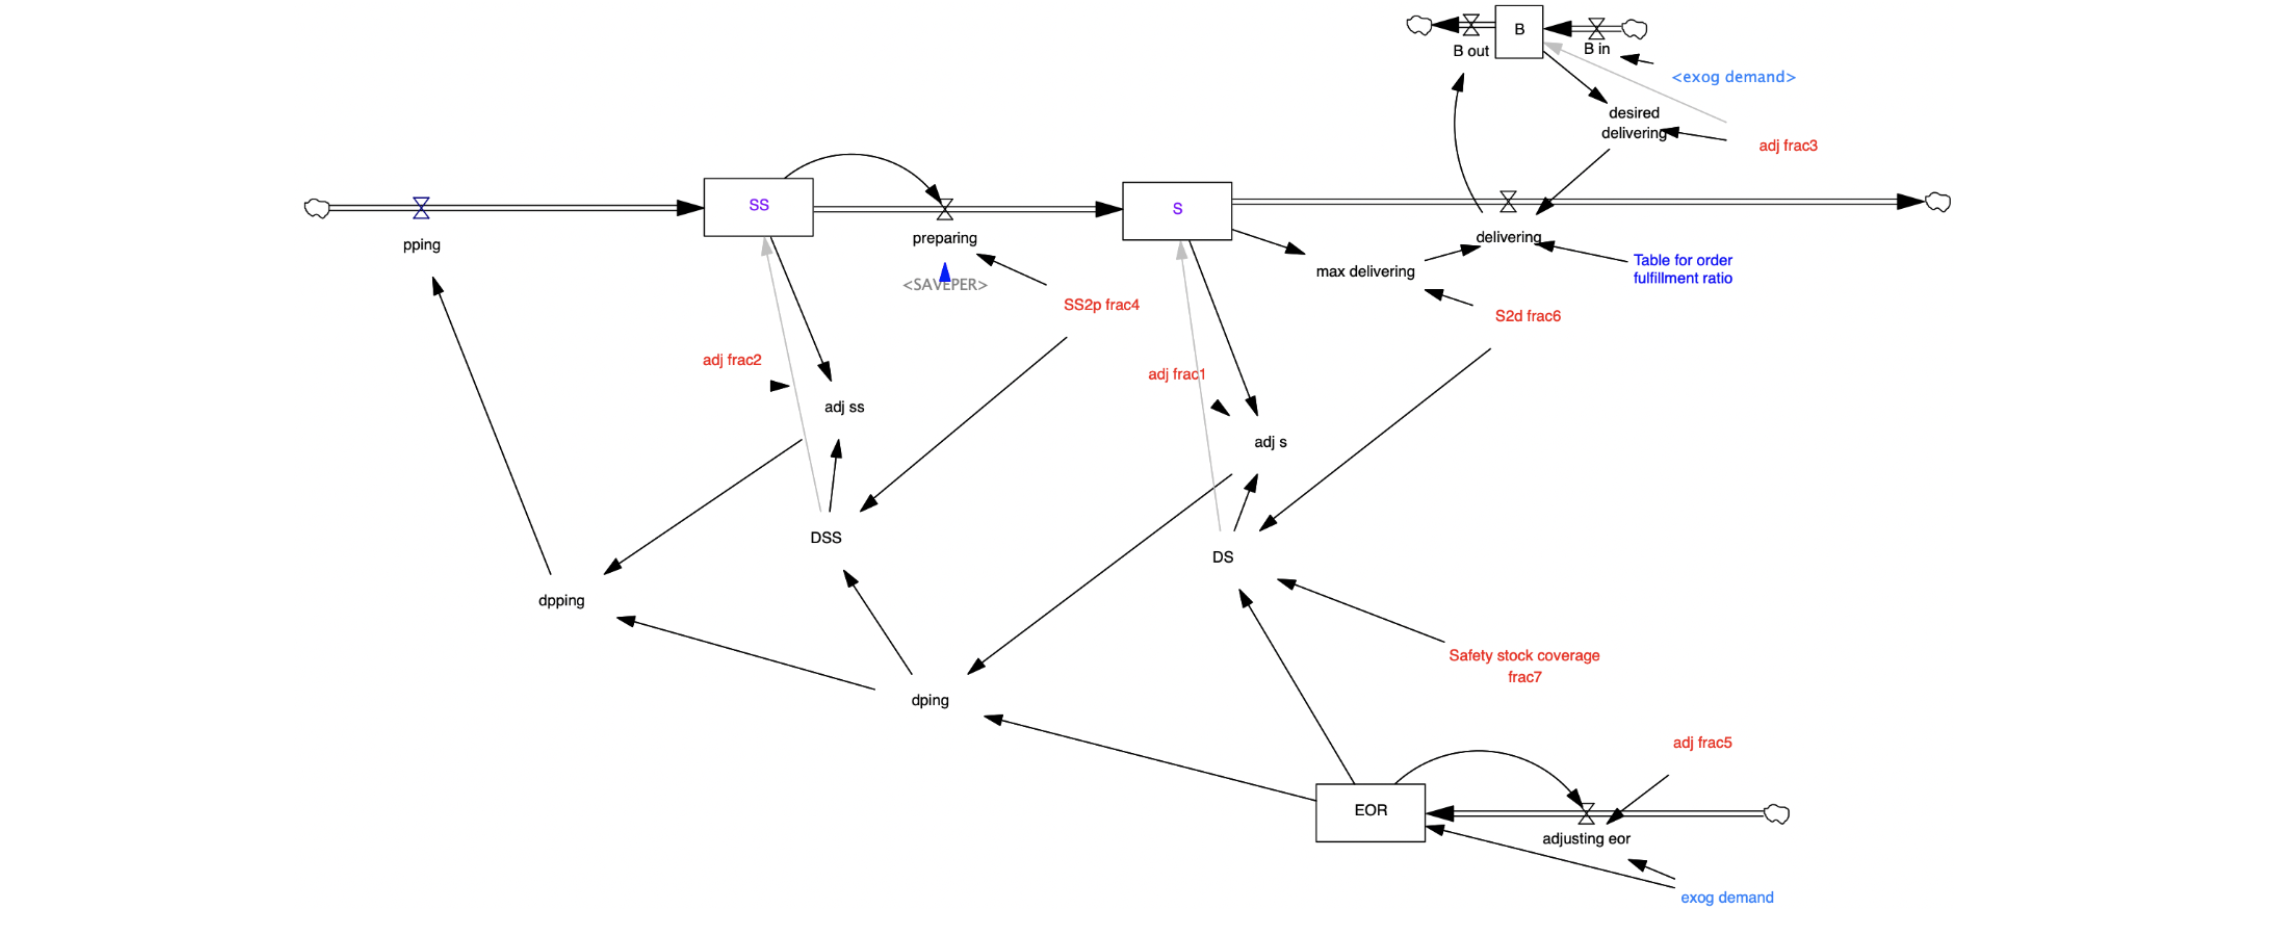

In [6]:
from stanify.builders.vensim2stan import Vensim2Stan
import numpy as np
import xarray as xr

home_path = "/Users/hyunjimoon/Dropbox/tolzul/BayesSD/code/pipeline/prescriptive/stanify"
vensim_model_path = "/Users/hyunjimoon/Dropbox/tolzul/BayesSD/code/pipeline/prescriptive/stanify/vensim_models/inventory.mdl" 

v2s_code = """
ss_obs[timesteps] ~ normal(ss[timesteps], sigma);
s_obs[timesteps] ~ normal(s[timesteps], sigma_s);
sigma<lower=0.1> ~ lognormal(0, 1);
sigma_s<lower=0.1> ~ lognormal(0, 1);
"""

timesteps = np.arange(0, 10, dtype=np.float32) + 1e-6

v2s = Vensim2Stan(v2s_code, vensim_model_path, ["ss_obs", "s_obs"], initial_time=0, integration_times=timesteps,
                  additional_data={"exog_demand": xr.DataArray(2 * timesteps + 1, dims=["timesteps"], coords={"timesteps": timesteps.astype(np.int32)})})

sbc_idata = v2s.run_sbc(n_fits=1, n_draws=1000, n_chains=1)

/Users/hyunjimoon/Dropbox/tolzul/BayesSD/code/pipeline/prescriptive/stanify/stanify/builders/stan_block_codegen.py:236: UserWarning: initial time was defined in vensim. It will be ignored in favor for the initial time setting passed to Vensim2Stan.
  warnings.warn("initial time was defined in vensim. It will be ignored in favor for the initial time setting passed to Vensim2Stan.")
19:44:37 - cmdstanpy - INFO - compiling stan file /Users/hyunjimoon/Dropbox/tolzul/BayesSD/code/pipeline/prescriptive/stanify/vignette/stan_files/inventory/draws2data_inventory.stan to exe file /Users/hyunjimoon/Dropbox/tolzul/BayesSD/code/pipeline/prescriptive/stanify/vignette/stan_files/inventory/draws2data_inventory
19:44:42 - cmdstanpy - INFO - compiled model executable: /Users/hyunjimoon/Dropbox/tolzul/BayesSD/code/pipeline/prescriptive/stanify/vignette/stan_files/inventory/draws2data_inventory
19:44:42 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

19:44:42 - cmdstanpy - INFO - CmdStan done processing.



Running SBC for dataset # 1 of 1


19:44:42 - cmdstanpy - INFO - compiling stan file /Users/hyunjimoon/Dropbox/tolzul/BayesSD/code/pipeline/prescriptive/stanify/vignette/stan_files/inventory/data2draws_inventory.stan to exe file /Users/hyunjimoon/Dropbox/tolzul/BayesSD/code/pipeline/prescriptive/stanify/vignette/stan_files/inventory/data2draws_inventory
19:44:47 - cmdstanpy - INFO - compiled model executable: /Users/hyunjimoon/Dropbox/tolzul/BayesSD/code/pipeline/prescriptive/stanify/vignette/stan_files/inventory/data2draws_inventory
19:44:47 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

In [ ]:
sbc_idata

Inference data with groups:
	> posterior
	> prior
	> prior_predictive
	> sample_stats_prior

stanify revolves around `Vensim2Stan` class. https://data4dm.github.io/stanify/stanify/builders/vensim2stan.html has detailed documentation for input-output arguments and submodules. `stan_model_context` includes variables included in main stanfile. this excludes variables defined only within `vensim_ode` function (i.e. auxiliary variables) such as `adj_ss`.

In [ ]:
v2s.stan_model_context.transformed_data_variables

{'adj_frac1',
 'adj_frac2',
 'adj_frac3',
 'adj_frac5',
 'final_time',
 'initial_time',
 's2d_frac6',
 'safety_stock_coverage_frac7',
 'saveper',
 'ss2p_frac4',
 'time_step'}

`vensim_model_context` describes variables defined in vensim and mostly for subscript documenting purpose.

In [ ]:
v2s.vensim_model_context.variables

{'preparing': VensimVariableContext(name='preparing', subscripts=(), is_stock=False, is_static_data=False, is_lookup=False, is_vensim_datastructure=False),
 'adj_frac2': VensimVariableContext(name='adj_frac2', subscripts=(), is_stock=False, is_static_data=True, is_lookup=False, is_vensim_datastructure=False),
 'ds': VensimVariableContext(name='ds', subscripts=(), is_stock=False, is_static_data=False, is_lookup=False, is_vensim_datastructure=False),
 'pping': VensimVariableContext(name='pping', subscripts=(), is_stock=False, is_static_data=False, is_lookup=False, is_vensim_datastructure=False),
 'max_delivering': VensimVariableContext(name='max_delivering', subscripts=(), is_stock=False, is_static_data=False, is_lookup=False, is_vensim_datastructure=False),
 'table_for_order_fulfillment_ratio': VensimVariableContext(name='table_for_order_fulfillment_ratio', subscripts=(), is_stock=False, is_static_data=False, is_lookup=True, is_vensim_datastructure=False),
 'dping': VensimVariableContex

In [ ]:
sbc_idata

Inference data with groups:
	> posterior
	> prior
	> prior_predictive
	> sample_stats_prior

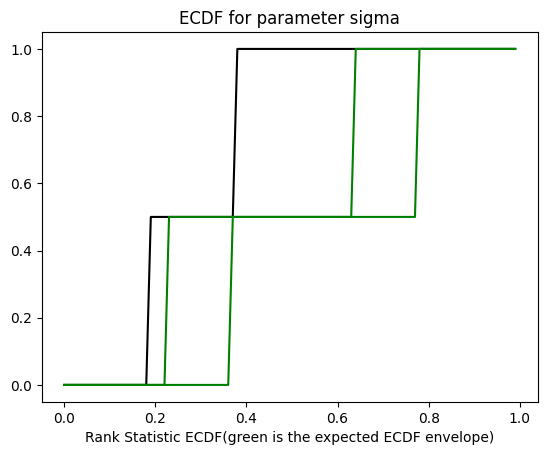

In [ ]:
plot_ecdf(sbc_idata, "sigma")

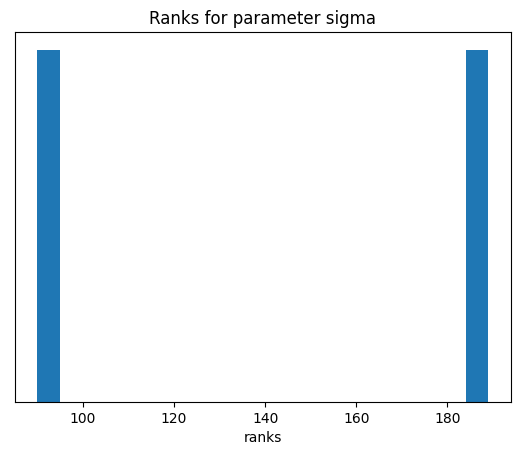

In [ ]:
plot_rank_hist(sbc_idata, "sigma")